In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Which model shoul you use?

Machine learning problems can be divided in two broad groups:
1. Classification, where you want to predict a label
2. Regression, where you want to predict a quantity

Which model you will choose, of course, depends on which kind of problem you are trying  to solve
<img src="resources/ml_map.png"/>
This map will help you decide base on the available data

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

data = pd.DataFrame(boston['data'], columns=boston['feature_names'])
data['target'] = pd.Series(boston['target'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#  We have fewer than 10k rows, so according to our map (and assuming all features are important) we should use 
# SVR with a linear kernel
data.size

7084

In [4]:
# Let's Split into fatures and labels
x = data.drop("target", axis=1)
y = data['target']

In [5]:
# Training and Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [6]:
# Training a SVR with Linear Kernel
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7426534861031638

In [7]:
# Trainig a Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)

0.7793666281168418

In [8]:
# Our score is kind of low, lets try SVR with rbf kernel
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22694532378829402

In [9]:
# No luck, let's try an ensemble
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.8842724203795034

In [11]:
"""
Ok, that's is better but how can we improve our model even further?
This is where hyperparameter come into play, each Machine Learning model has a series
of hyperparameter (as opossed to parameters which are learned during the fitting process)
that we can tune to try and improve the model's performance, example of hyperparameters for
a RandomForestRegressor can be seen with .get_params().
For our SVR model, the kernel is a hyperparameter too.
"""
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
"""
Lets try to improve our RandomForestRegressor by adjusting the number of estimators (n_estimators)
used by it
"""
max_score = 0
best_model = None
for i in range(100, 500, 50):
    model = RandomForestRegressor(n_estimators=i)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"{i} estimators got a score of {score}")
    if score > max_score:
        max_score=score
        best_model = model
        
print(score, best_model.get_params()["n_estimators"])

100 estimators got a score of 0.8797469707521507
150 estimators got a score of 0.8706737055071729
200 estimators got a score of 0.8792092125940986
250 estimators got a score of 0.8730519942550122
300 estimators got a score of 0.8698825705813734
350 estimators got a score of 0.8763184702070762
400 estimators got a score of 0.8793883178240097
450 estimators got a score of 0.8751188486071046
0.8751188486071046 100


In [17]:
"""
As we can see, changing the n_estimators hyperparameter didn't change that much our score
""";

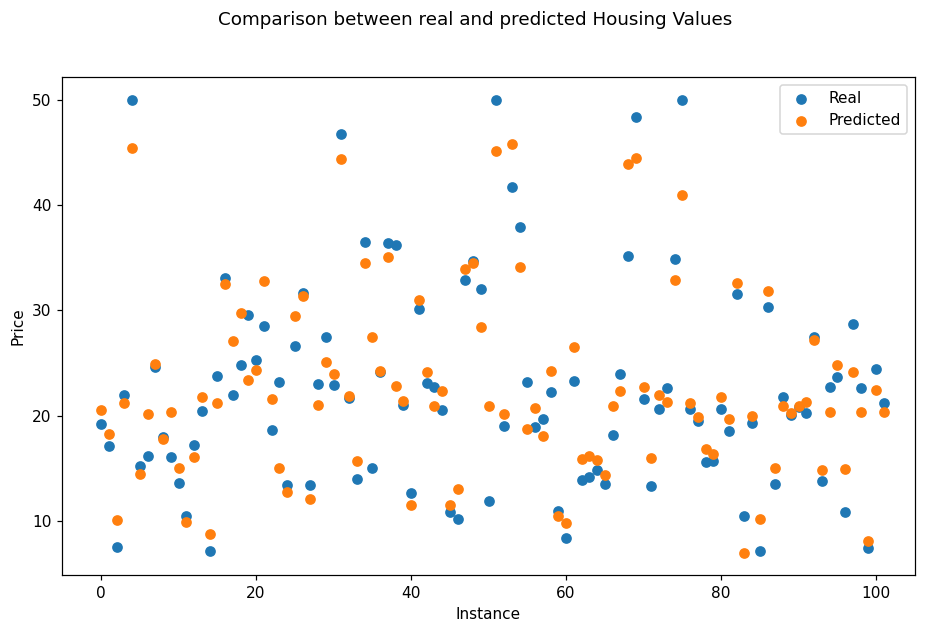

In [39]:
"""
Here we plot the predicted values alongside with the real values to get a visual representation of
our model's performance
"""
fig, ax = plt.subplots(figsize=(10,6), dpi=110)
fig.suptitle("Comparison between real and predicted Housing Values")
ax.scatter(x=range(0,y_test.size), 
           y=y_test, 
           label="Real")
ax.scatter(x=range(0,y_test.size), 
           y= best_model.predict(x_test), 
           label="Predicted")
ax.set(ylabel="Price", xlabel="Instance")
ax.set_xlim(-5, 105)
ax.legend();

## Chosing a model for a classification problem

In [40]:
heart_disease = pd.read_csv("resources/heart-disease.csv")
heart_disease.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


In [41]:
heart_disease.size

4242

We have classification (disease or no-disease) problem with 4k+ samples, by our model selection map we should then use a LinearSVC model, lets do this

In [42]:
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [117]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0, max_iter=10000)
lsvc.fit(x_train,y_train)
lsvc.score(x_test, y_test)

/home/phyrlae/miniconda3/envs/udemy/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8360655737704918

In [136]:
"""
Ok, we got 83.6% Accuracy and a warning telling us that the model failed to converge, we can play around with
the max_iter parameter of the LinearSVC to give it more time for the model to converge
we also set the random state to ensure that our results are reproductible
if we remove that parameter and rerun the cell above many times, we will notice that the score varies wildly between
iterations, so technically we don't have a good model yet, let's try another model, according to our
map, we chould now try a KNNClassifier
"""
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.7049180327868853

In [137]:
"""
We get a lower acurracy, but if we run the cell above many times we will notice that our score doesn't change.
This is because the KNN algorithm has no random parts, all it does is try to find for each input the K samples that
are most alike to it (an thus K-neighbors), each of the K neighbors "votes" for it's own class and then the input 
is classified as the class with most votes. We can tune the hyperparameter K to try and get a better scores
"""
for i in range(5,50,5):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"{i} neighbors got a score of {score}")

5 neighbors got a score of 0.7049180327868853
10 neighbors got a score of 0.639344262295082
15 neighbors got a score of 0.7049180327868853
20 neighbors got a score of 0.6885245901639344
25 neighbors got a score of 0.6885245901639344
30 neighbors got a score of 0.6721311475409836
35 neighbors got a score of 0.7049180327868853
40 neighbors got a score of 0.7049180327868853
45 neighbors got a score of 0.6721311475409836


In [144]:
"""
Can we do better still? Lets try a SVC (not the Linear kind)
"""
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_test,y_test)

0.6885245901639344

In [158]:
"""
It may appear worse than the LinearSVC, but running the cell multiple times will give us always the
same score and no warning this means the model has converged! But we can still try an Ensemble Classifier
"""
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.819672131147541

In [169]:
"""
The RandomForest model got a pretty nice score, 80-81% depending on the random state, as shown above
we can improve this even further by tweaking our hyperparameters.
As a note: Ussualy ensemble methods will perform well on structured data (such as a table of features and targets)
while deep learning and transfer learnign will work well with unstructured data (such as images).

We can also use predict_proba() to predict the probability that a given input is from a given class
it returns a matrix with N rows (the number of samples) and each row contains a probability
vector that represents the probability that a given sample belongs to each class, of course
the sum of each row must be one (each value belongs to soem class)
"""
rfc.predict_proba(x_test)[:10]

array([[0.73, 0.27],
       [0.91, 0.09],
       [0.21, 0.79],
       [0.01, 0.99],
       [0.9 , 0.1 ],
       [0.23, 0.77],
       [0.38, 0.62],
       [0.1 , 0.9 ],
       [0.36, 0.64],
       [0.86, 0.14]])